In [1]:
import numpy as np              # importing Data Analysis Libraries
import pandas as pd
import random
from IPython.display import Image

In [4]:
n = np.random.randint(0, 1000)  # Generating random values
m = np.random.randint(0, 1000)
k = np.random.randint(0, 1000)
N = np.random.randint(0, 1000)

In [5]:
print("Values randomly generated, n=",str(n),"m=",str(m),"k=",str(k),"N=",str(N))

Values randomly generated, n= 950 m= 913 k= 22 N= 98


---

## Initialization of the values and creating My-Data table
### Selecting the size of the attributes and populating them.. for example Feature_A <span style="color:blue"> [FA-1, ..FA-n] </span> is until  n=950   
### for Attributes Features FB & FC ->   <span style="color:blue"> FB-1,FB-2,..FB-m </span>until m and <span style="color:green"> FC-1,FC-2,..FC-k</span> until k

In [18]:
# Creating a list of Features_A for the Feature Name until n (until m for Feature B and k for Feature C)
# then the Feature A value which is: FA-1,FA-2,...FA-n
# then the Total for each Feature which is sum(N) for Feature A and C and count(ID) for Feature B
# then the percentage of all values devided by Total
# and then the normalization of percentage - explained below!
# percentage rounded to the 3rd decimal
# adding all of them in one Dataframe (Feature_FA)
# and renaming the column names 

Feature_FA        = pd.DataFrame(["Feature_A" for id in range(1,n)])           
FA_string         = pd.DataFrame(["FA-"+str(id) for id in range(1,n)])         
TotalFA           = pd.DataFrame([random.randrange(1,1000) for i in range(n)]) 
percentageFA      = TotalFA/TotalFA.sum()                                   
percentageFAR     = percentageFA.round(decimals=3)
percentageFAnorm  = 1/((percentageFA.max()-percentageFA.min())*(percentageFA-percentageFA.max())+1)/len(percentageFA)
percentageFAnormR = percentageFAnorm.round(decimals=3)                                                                     


Feature_FA["FA_string"]  = FA_string
Feature_FA["TotalFA"]    = TotalFA
Feature_FA["Percentage"] = percentageFAR
Feature_FA.columns       ={"Feature_Name":"Feature_Name",
                           "Feature_Value":"Feature_Value",
                            "Total":"Total",
                            "Percentage":"Percentage"}

# same process follows for Feature B

Feature_FB        = pd.DataFrame(["Feature_B" for id in range(1,m)])
FB_string         = pd.DataFrame(["FB-"+str(id) for id in range(1,m)])
TotalFB           = pd.DataFrame([random.randrange(1,1000) for i in range(m)])
percentageFB      = TotalFB/TotalFB.sum()
percentageFB      = percentageFB.round(decimals=3)


Feature_FB["FB_string"]  = FB_string
Feature_FB["TotalFB"]    = TotalFB
Feature_FB["Percentage"] = percentageFB
Feature_FB.columns       = {"Feature_Name":"Feature_Name",
                            "Feature_Value":"Feature_Value",
                            "Total":"Total",
                            "Percentage":"Percentage"}

## same process followed for Feature C

Feature_FC       = pd.DataFrame(["Feature_C" for id in range(1,k)])
FC_string        = pd.DataFrame(["FC-"+str(id) for id in range(1,k)])
TotalFC          = pd.DataFrame([random.randrange(1,1000) for i in range(k)])
percentageFC     = TotalFC/TotalFC.sum()
percentageFC     = percentageFC.round(decimals=3)

Feature_FC["FC_string"]  = FC_string
Feature_FC["TotalFC"]    = TotalFC
Feature_FC["Percentage"] = percentageFC
Feature_FC.columns       = {"Feature_Name":"Feature_Name",
                            "Feature_Value":"Feature_Value",
                            "Total":"Total",
                            "Percentage":"Percentage"}

# Adding all 3 features to ResultTable using the append mathod

ResultTable = pd.DataFrame(Feature_FA)            
ResultTable = ResultTable.append(Feature_FB)
ResultTable = ResultTable.append(Feature_FC)
ResultTable = ResultTable.set_index([pd.Index(range(n+m+k-3))])

In [19]:
# The sum(N) (for features A & C) and count(Id) (for feature B) to calculate the Total(FA,FB,FC) 
# was not calculated for each feature value but instead was added from randonly genarated numbers
# this is the value Total(FA,FB,FC) --> TotalFC=pd.DataFrame([random.randrange(1,1000) for i in range(k)])
# I guess there is a small ambiguity in the exercise, because:
# If each Feature had an attribute N, then the sum(N), would have created 2 different values for the 2 different features, 
# since the sum of N would be the same and since Total=sum(N), (For A & C)

In [20]:
Id_desc = "An Id which is also the key to the table MyData"
Feature_desc = "A feature."
N_desc = "An extensive quantity such as count, lenth, volume..."

In [21]:
data = {"Attribute": ["Id", "Feature_FA", "Feature_FB", "Feature_FC", "N"], "Type": ["Type(Id)",str,str,str,int],
        "Domain": ["Type(Id)",FA_string, FB_string, FC_string, "N>=0"],
        "Description":[Id_desc,Feature_desc,Feature_desc,Feature_desc,N_desc]}
MyDataTable = pd.DataFrame(data=data)

In [22]:
MyDataTable # Preview of My-Data table,  same as the exercise 

,Attribute,Type,Domain,Description
0,Id,Type(Id),Type(Id),An Id which is also the key to the table MyData
1,Feature_FA,<class 'str'>,0 0 FA-1 1 FA-2 2 FA-...,A feature.
2,Feature_FB,<class 'str'>,0 0 FB-1 1 FB-2 2 FB-...,A feature.
3,Feature_FC,<class 'str'>,0 0 FC-1 1 FC-2 2 FC-3 3 F...,A feature.
4,N,<class 'int'>,N>=0,"An extensive quantity such as count, lenth, vo..."


### saving data to csv file 
#### the file can be found at git repo

In [23]:
MyDataTable.to_csv(r'C:\Users\Admin\Dropbox\Machine_Learning\ML2020\DataEngineeringTest\MyData.csv')

---

### Printing the Result Table

In [24]:
ResultTable.head()

,Feature_Name,Feature_Value,Total,Percentage
0,Feature_A,FA-1,673,0.001
1,Feature_A,FA-2,98,0.000
2,Feature_A,FA-3,940,0.002
3,Feature_A,FA-4,387,0.001
4,Feature_A,FA-5,607,0.001


In [25]:
ResultTable.tail()

,Feature_Name,Feature_Value,Total,Percentage
1877,Feature_C,FC-17,57,0.005
1878,Feature_C,FC-18,436,0.037
1879,Feature_C,FC-19,66,0.006
1880,Feature_C,FC-20,515,0.044
1881,Feature_C,FC-21,873,0.074


In [31]:
ResultTable[1850:1870]

,Feature_Name,Feature_Value,Total,Percentage
1850,Feature_B,FB-902,511,0.001
1851,Feature_B,FB-903,40,0.000
1852,Feature_B,FB-904,828,0.002
1853,Feature_B,FB-905,823,0.002
1854,Feature_B,FB-906,880,0.002
1855,Feature_B,FB-907,249,0.001
1856,Feature_B,FB-908,716,0.002
1857,Feature_B,FB-909,299,0.001
1858,Feature_B,FB-910,43,0.000
1859,Feature_B,FB-911,554,0.001


In [32]:
#### To make sure that the sum of all percetages (for all features) is always equal to 1
#### by deviding with the summary of all percentages, this is achieved

#### Furthermore, the way to perform this is by feature scaling - data normalization
#### with min-max scaling and rescaling the range of features to the range in [0, 1]

#### Onother way to linearly rescale data values into a new range min' to max' is
#### by using the following formula:
#### normilized= (max'-min')/((max-min)*(value-max)+max'/ #number of values), 
#### where in our case, max' =1

#### In order to present the different cases, and the rounding error 
#### all values were preserved (only for Feature A, for demostration purposes)

In [33]:
print("Sum of all percentages devided by sum:",percentageFA.sum(),"\n",
      "Sum of all percentages rounded id 3rd decimal",percentageFAR.sum(),"\n",
      "Sum of all percentages normilized:",percentageFAnorm.sum(),"\n",
      "Sum of all percentages rounded in 3rd decimal after normzalization",percentageFAnormR.sum())

Sum of all percentages devided by sum: 0    1.0
dtype: float64 
 Sum of all percentages rounded id 3rd decimal 0    0.995
dtype: float64 
 Sum of all percentages normilized: 0    1.000002
dtype: float64 
 Sum of all percentages rounded in 3rd decimal after normzalization 0    0.95
dtype: float64


In [34]:
####  By rounding in the 3rd decimal, we lose in accuracy
####  This is a numeric decision problem on normalization and can be further discussed
#### Some interesting information could be found under the following link
#   https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

In [35]:
#### ANother was to perform feature scaling is by using reade libray modules
#### importing the preprocessing module of the machine learning library skikit-learn
#### as follows

In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(percentageFA)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
percentageFA.sum(), percentageFB.sum(), percentageFC.sum()

(0    1.0
 dtype: float64, 0    1.019
 dtype: float64, 0    1.0
 dtype: float64)

---

### Creating MyData table in SQL

In [38]:
import sqlite3

connection = sqlite3.connect("MyDataTable.db")

cursor = connection.cursor()

sql_command ="""DROP TABLE IF EXISTS MyDataTable;"""
cursor.execute(sql_command)

sql_command ="""CREATE TABLE MyDataTable(
    Id CHAR(8) PRIMARY KEY, 
    Feature_Name TEXT, 
    Feature_Value CHAR(8),
    Total INTEGER, 
    N INTEGER,
    Percentage FLOAT);"""

cursor.execute(sql_command) 


sql_command = """INSERT INTO MyDataTable(
    Id, Feature_Name, Feature_Value, Total, N, Percentage) 
    VALUES(abs(random()), "Feature_A", 
    round(abs(random()/92233720368547758.07),0), 
    round(abs(random()/92233720368547758.07),0), 
    round(abs(random()/92233720368547758.07),0),abs(random()%1));"""

# Using round(abs(random()/92233720368547758.07),0) to generate values between 1 and 100
cursor.execute(sql_command) 

sql_command = """INSERT INTO MyDataTable(
    Id, Feature_Name, Feature_Value, Total, N, Percentage) 
    VALUES(abs(random()), "Feature_B", 
    round(abs(random()/92233720368547758.07),0),
    round(abs(random()/92233720368547758.07),0),
    round(abs(random()/92233720368547758.07),0),abs(random()%10));"""
cursor.execute(sql_command)

sql_command = """INSERT INTO MyDataTable(
    Id, Feature_Name, Feature_Value, Total, N, Percentage) 
    VALUES(abs(random()), "Feature_C", 
    round(abs(random()/92233720368547758.07),0),
    round(abs(random()/92233720368547758.07),0),
    round(abs(random()/92233720368547758.07),0),abs(random()) %1);"""
cursor.execute(sql_command)

# sql_command ="""
# SET number =1
# While (@number <= 20)
# Begin
#     INSERT into MyDataTable (
#     Id, Feature_Name, Feature_Value, Total, N, Percentage) VALUES(
#     abs(random()), "Feature_B", round(abs(random()/92233720368547758.07),0), round(abs(random()/92233720368547758.07),0), round(abs(random()/92233720368547758.07),0),abs(random()%1))
#     SET @number = number +1
# End;"""

# cursor.execute(sql_command)


connection.commit()

connection.close()

In [43]:
from sqlalchemy import create_engine
from contextlib import closing

connection = sqlite3.connect("resultTable.db")

ResultTable.to_sql("resultTable", connection, if_exists='replace', index = False)


connection.commit()

connection.close()

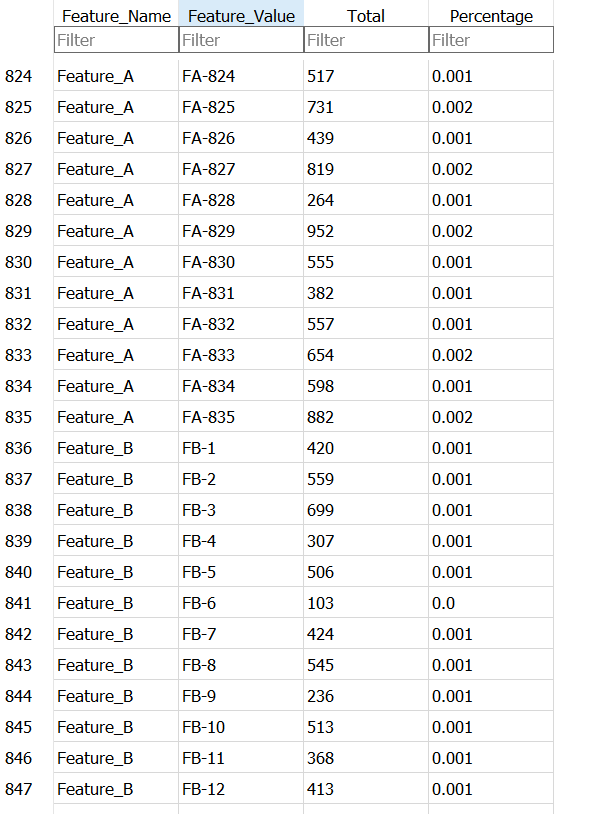

In [115]:
Image("resultTable.png")

---